# 画图：不同切分点1

In [5]:
xls_str = '''
SP	2	4	6	8	10	12
MIA	0.5243	0.4393	0.4215	0.2478	0.1195	0.081
SIP	0.9364	0.9224	0.9112	0.8981	0.8848	0.8832
BiSR (f)	0.9906	0.9923	0.9822	0.9382	0.8936	0.883
'''
rows = xls_str.split('\n')
rows = [row.split('\t') for row in rows if row]
rows = {row[0]: [float(f) for f in row[1:]] for row in rows}
rows['SP']= [int(f) for f in rows['SP']]

In [6]:
rouges = {}
rouges_bip = {}
rouges_tag = {}
rouges_mia = {}

for idx,ep in enumerate(rows['SP']):
    rouges[ep] = rows['SIP'][idx]
    rouges_bip[ep] = rows['BiSR (f)'][idx]
    rouges_mia[ep] = rows['MIA'][idx]

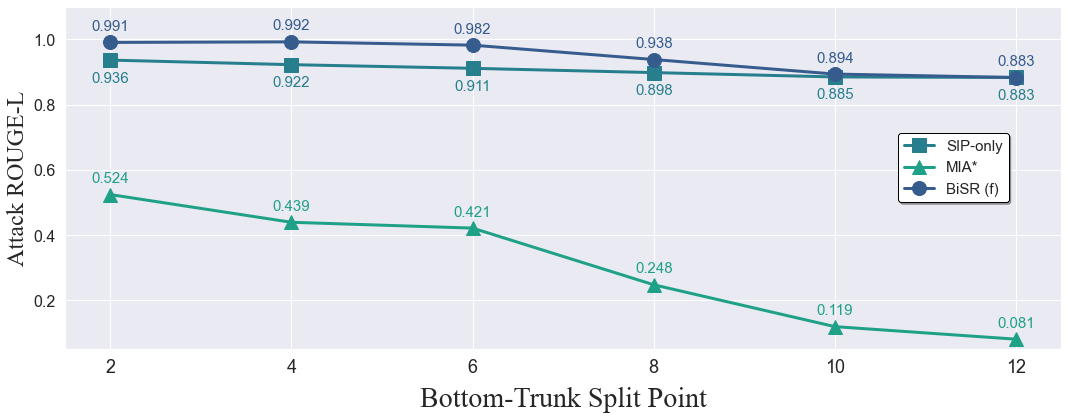

In [7]:

import matplotlib.pyplot as plt
import seaborn as sns

sns.set()
sns.set_style("darkgrid")
fig, ax1 = plt.subplots(figsize=(15, 6))
# plot rouge
atk_colors = sns.color_palette("viridis", 6)
atk_colors2 = sns.color_palette('coolwarm', 6)
atk_colors3 = sns.color_palette('cool', 6)
atk_colors4 = sns.color_palette('Spectral', 6)
color_ppl = sns.color_palette("autumn", 6)[3]
all_data = { 'SIP-only': rouges, 'MIA*': rouges_mia, 'BiSR (f)': rouges_bip}
colors = {'BiSR (f)': atk_colors[1], 'SIP-only': atk_colors[2], 'MIA*': atk_colors[3]}
markers = {'BiSR (f)': 'o', 'SIP-only': 's', 'MIA*': '^','Test-PPL':'d'}

ax1.set_ylabel('Attack ROUGE-L', fontsize=24,fontname="Times New Roman")
ax1.tick_params(axis='x', labelsize=18)
ax1.tick_params(axis='y', labelsize=16)
# the font suitable for thesis
ax1.set_xlabel('Bottom-Trunk Split Point', fontsize=28, fontname="Times New Roman", labelpad=10)
ax1.set_ylim(0.05, 1.1)
# ax2 = ax1.twinx()
# ax2.set_ylabel('LLM Test-Perplexity', fontsize=24, fontname="Times New Roman", color=color_ppl)
# ax2.tick_params(axis='y', labelcolor=color_ppl, labelsize=16)
# ax2.set_ylim(21, 35)
for name, data in all_data.items():
    axis = ax1
    linestyle='-'
    # if name =='Test-PPL':
    #     axis = ax2
    #     linestyle = '--'
    axis.plot(data.keys(), data.values(), color=colors[name], marker=markers[name], markersize=14, label=name, linestyle=linestyle, linewidth=3)

    for i, (ep, rg) in enumerate(data.items()):
        ofst = 12
        if name == 'SIP-only':
            ofst = -22
        if name =='Test-PPL' and ep == 9600:
            ofst = 30
        axis.annotate(f'{rg:.3f}', (ep, rg), textcoords="offset points",
                     xytext=(0, ofst),
                     ha='center', fontsize=15, color=colors[name])


# the legend with rounded corner and white background
fig.legend(loc='lower left', bbox_to_anchor=(0.83, 0.50), ncol=1, fontsize=15, frameon=True, fancybox=True, shadow=True, framealpha=1, edgecolor='black',facecolor='white')

# ax2.yaxis.grid(False)


# save the figure
plt.tight_layout()
plt.savefig('./diff_split_mia.pdf')